In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/rucode-2024-3/hotel_booking_data/train/train.csv')

In [3]:
df = df.drop(columns='service_id')
df = df.drop(columns='client_id')

In [4]:
df

,service_date,service_checkin,service_checkout,service_price,service_child_cnt,service_people_cnt,client_segment,hotel_id,country_name,city_name,category_star,hotel_type,hotel_seasonal,room_category,service_status
0,2016-12-28,2017-01-13,2017-01-20,78457.60,0.0,2.0,b2bBusinessTravel,3538,Россия,NaN,5.0,hotel,0,70,0
1,2016-12-28,2017-01-16,2017-01-17,2395.80,0.0,1.0,b2b2c,7695,Россия,Реутов,0.0,hotel,0,20,1
2,2016-12-28,2017-01-19,2017-01-23,10062.36,0.0,2.0,b2b2c,36934,Россия,Санкт-Петербург,3.0,mini-hotel,0,50,0
3,2016-12-28,2016-12-31,2017-01-01,2332.00,0.0,2.0,b2b2c,7107,Россия,Биробиджан,3.0,hotel,0,30,0
4,2016-12-28,2016-12-29,2016-12-30,2259.92,0.0,1.0,b2bBusinessTravel,3966,Россия,Владивосток,0.0,hotel,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832805,2019-07-20,2019-08-29,2019-08-30,2615.37,0.0,2.0,b2b2c,63,Россия,Уфа,3.0,hotel,0,30,0
2832806,2019-07-20,2019-07-20,2019-07-21,3943.00,0.0,4.0,b2bBusinessTravel,825,Россия,Березово,3.0,hotel,0,30,0
2832807,2019-07-20,2019-08-08,2019-08-09,2807.83,0.0,2.0,b2bBusinessTravel,9917,Россия,Хабаровск,0.0,hotel,0,30,0
2832808,2019-07-20,2019-07-21,2019-07-24,6000.00,0.0,4.0,b2b2c,155677,Россия,Красноярск,0.0,city-serviced-apartments,0,10,0


In [5]:
def visualize_distribution(dataframe, column_name):
    plt.figure(figsize=(8, 6))
    dataframe[column_name].hist(bins=100, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

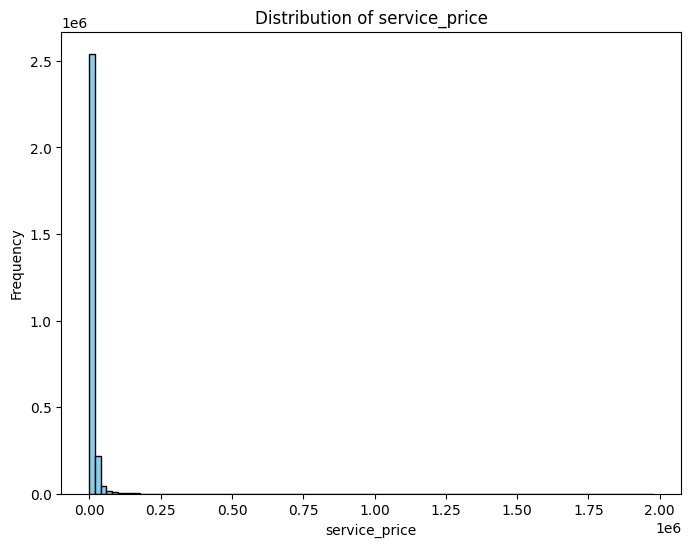

In [6]:
visualize_distribution(df, 'service_price')

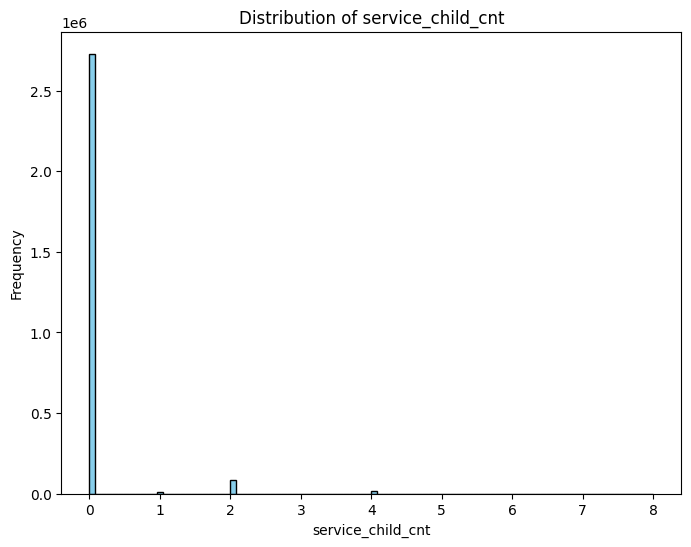

In [7]:
visualize_distribution(df, 'service_child_cnt')

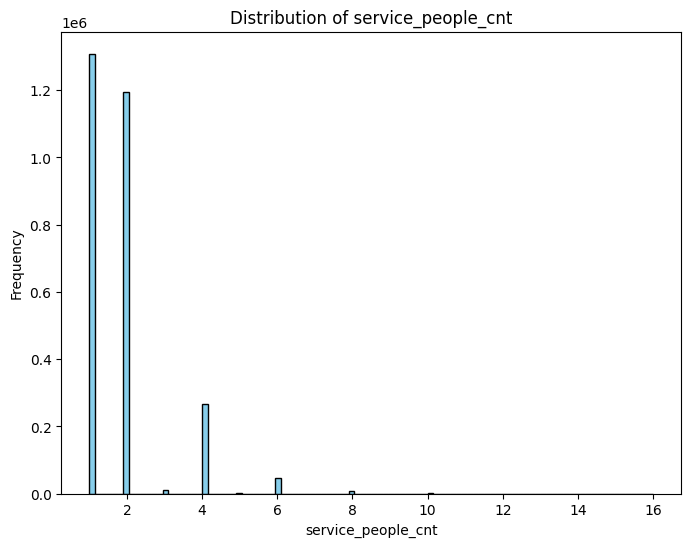

In [8]:
visualize_distribution(df, 'service_people_cnt')

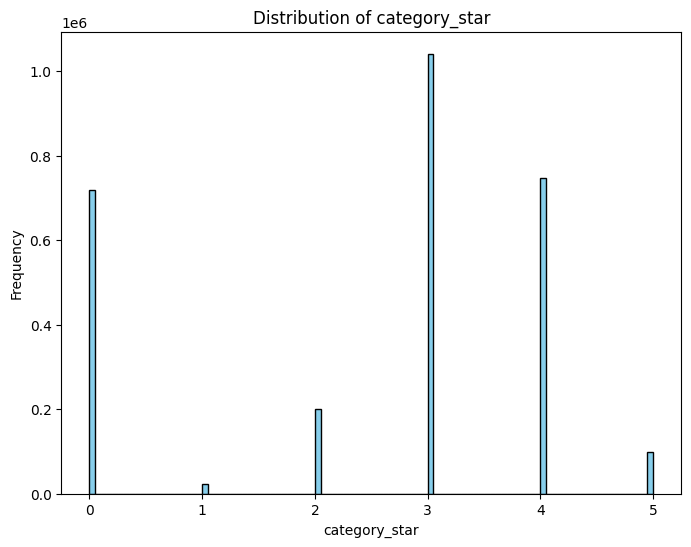

In [9]:
visualize_distribution(df, 'category_star')

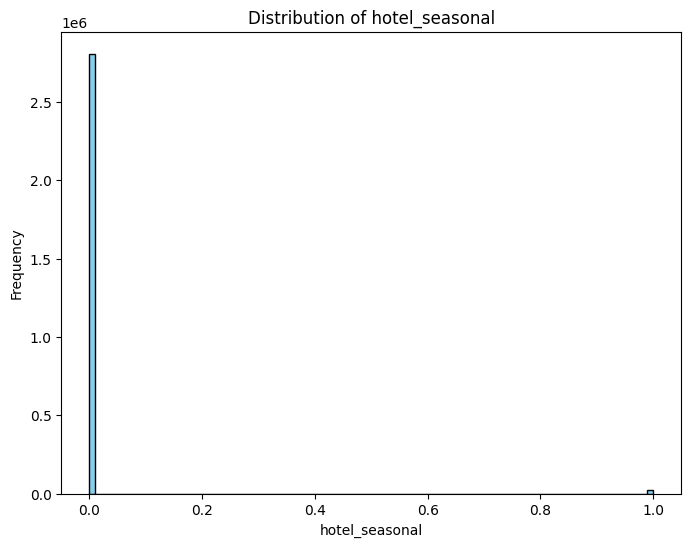

In [10]:
visualize_distribution(df, 'hotel_seasonal')

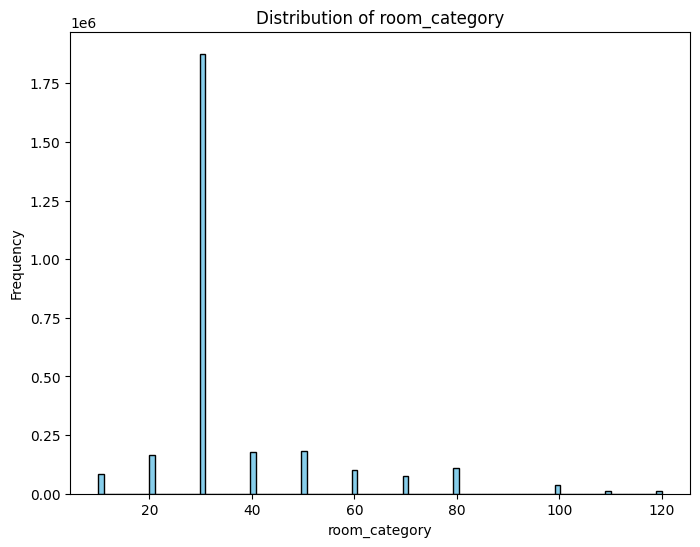

In [11]:
visualize_distribution(df, 'room_category')

In [6]:
from sklearn.utils.class_weight import compute_class_weight

y_ = df.service_status
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_), y=y_)
class_weights

array([0.58112189, 3.58178214])

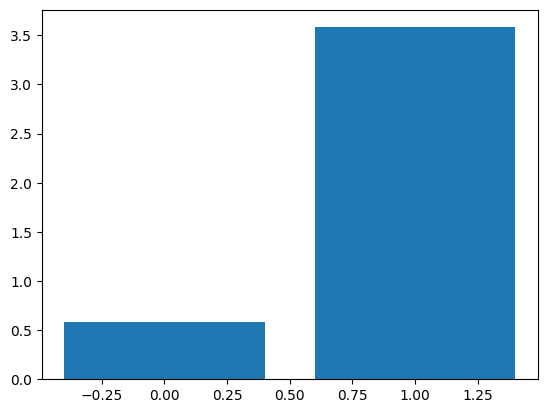

In [7]:
plt.bar(np.unique(y_), class_weights)
plt.show()

In [9]:
df.isna().sum()

service_date              0
service_checkin           0
service_checkout          0
service_price             0
service_child_cnt       258
service_people_cnt      258
client_segment        29741
hotel_id                  0
country_name              0
city_name              1294
category_star             1
hotel_type                0
hotel_seasonal            0
room_category             0
service_status            0
dtype: int64

In [10]:
df['service_child_cnt'] = df['service_child_cnt'].fillna(round(df['service_child_cnt'].mean()))
df['service_people_cnt'] = df['service_people_cnt'].fillna(round(df['service_people_cnt'].mean()))
df['client_segment'] = df['client_segment'].fillna('none')
df['city_name'] = df['city_name'].fillna('none')
df['category_star'] = df['category_star'].fillna(round(df['category_star'].mean()))

In [11]:
df.isna().sum()

service_date          0
service_checkin       0
service_checkout      0
service_price         0
service_child_cnt     0
service_people_cnt    0
client_segment        0
hotel_id              0
country_name          0
city_name             0
category_star         0
hotel_type            0
hotel_seasonal        0
room_category         0
service_status        0
dtype: int64

In [12]:
df['service_date'] = pd.to_datetime(df['service_date'])
df['service_checkin'] = pd.to_datetime(df['service_checkin'])
df['service_checkout'] = pd.to_datetime(df['service_checkout'])

In [13]:
df

,service_date,service_checkin,service_checkout,service_price,service_child_cnt,service_people_cnt,client_segment,hotel_id,country_name,city_name,category_star,hotel_type,hotel_seasonal,room_category,service_status
0,2016-12-28,2017-01-13,2017-01-20,78457.60,0.0,2.0,b2bBusinessTravel,3538,Россия,none,5.0,hotel,0,70,0
1,2016-12-28,2017-01-16,2017-01-17,2395.80,0.0,1.0,b2b2c,7695,Россия,Реутов,0.0,hotel,0,20,1
2,2016-12-28,2017-01-19,2017-01-23,10062.36,0.0,2.0,b2b2c,36934,Россия,Санкт-Петербург,3.0,mini-hotel,0,50,0
3,2016-12-28,2016-12-31,2017-01-01,2332.00,0.0,2.0,b2b2c,7107,Россия,Биробиджан,3.0,hotel,0,30,0
4,2016-12-28,2016-12-29,2016-12-30,2259.92,0.0,1.0,b2bBusinessTravel,3966,Россия,Владивосток,0.0,hotel,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832805,2019-07-20,2019-08-29,2019-08-30,2615.37,0.0,2.0,b2b2c,63,Россия,Уфа,3.0,hotel,0,30,0
2832806,2019-07-20,2019-07-20,2019-07-21,3943.00,0.0,4.0,b2bBusinessTravel,825,Россия,Березово,3.0,hotel,0,30,0
2832807,2019-07-20,2019-08-08,2019-08-09,2807.83,0.0,2.0,b2bBusinessTravel,9917,Россия,Хабаровск,0.0,hotel,0,30,0
2832808,2019-07-20,2019-07-21,2019-07-24,6000.00,0.0,4.0,b2b2c,155677,Россия,Красноярск,0.0,city-serviced-apartments,0,10,0


In [14]:
df['diff_1'] = (df['service_checkin'] - df['service_date']).astype('int')
df['diff_2'] = (df['service_checkout'] - df['service_checkin']).astype('int')

In [15]:
df['average_booking_price_per_hotel'] = df.groupby('hotel_id')['service_price'].transform('mean')

In [16]:
df['daily_booking_count_per_hotel'] = df.groupby('hotel_id')['service_date'].transform('count')

In [17]:
df['service_month'] = df['service_date'].dt.month
df['service_day_of_week'] = df['service_date'].dt.dayofweek

df = df.drop(columns=['service_date'])

In [18]:
df['checkin_month'] = df['service_checkin'].dt.month
df['checkin_day_of_week'] = df['service_checkin'].dt.dayofweek

df = df.drop(columns=['service_checkin'])

In [19]:
df['checkout_month'] = df['service_checkout'].dt.month
df['checkout_day_of_week'] = df['service_checkout'].dt.dayofweek

df = df.drop(columns=['service_checkout'])

In [20]:
df

,service_price,service_child_cnt,service_people_cnt,client_segment,hotel_id,country_name,city_name,category_star,hotel_type,hotel_seasonal,...,diff_1,diff_2,average_booking_price_per_hotel,daily_booking_count_per_hotel,service_month,service_day_of_week,checkin_month,checkin_day_of_week,checkout_month,checkout_day_of_week
0,78457.60,0.0,2.0,b2bBusinessTravel,3538,Россия,none,5.0,hotel,0,...,1382400000000000,604800000000000,66646.767732,291,12,2,1,4,1,4
1,2395.80,0.0,1.0,b2b2c,7695,Россия,Реутов,0.0,hotel,0,...,1641600000000000,86400000000000,15052.441379,29,12,2,1,0,1,1
2,10062.36,0.0,2.0,b2b2c,36934,Россия,Санкт-Петербург,3.0,mini-hotel,0,...,1900800000000000,345600000000000,9556.194966,149,12,2,1,3,1,0
3,2332.00,0.0,2.0,b2b2c,7107,Россия,Биробиджан,3.0,hotel,0,...,259200000000000,86400000000000,6676.293704,405,12,2,12,5,1,6
4,2259.92,0.0,1.0,b2bBusinessTravel,3966,Россия,Владивосток,0.0,hotel,0,...,86400000000000,86400000000000,13407.645274,785,12,2,12,3,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832805,2615.37,0.0,2.0,b2b2c,63,Россия,Уфа,3.0,hotel,0,...,3456000000000000,86400000000000,6983.245028,2156,7,5,8,3,8,4
2832806,3943.00,0.0,4.0,b2bBusinessTravel,825,Россия,Березово,3.0,hotel,0,...,0,86400000000000,7961.547586,58,7,5,7,5,7,6
2832807,2807.83,0.0,2.0,b2bBusinessTravel,9917,Россия,Хабаровск,0.0,hotel,0,...,1641600000000000,86400000000000,4576.835887,1364,7,5,8,3,8,4
2832808,6000.00,0.0,4.0,b2b2c,155677,Россия,Красноярск,0.0,city-serviced-apartments,0,...,86400000000000,259200000000000,3198.277419,31,7,5,7,6,7,2


In [21]:
cat = ['client_segment', 'hotel_id', 'country_name', 'city_name', 'hotel_type', 'room_category']

In [22]:
for col in cat:
    df[col] = df[col].astype('str')

In [23]:
from sklearn.model_selection import train_test_split

X, y = df.drop(['service_status'], axis=1), df['service_status']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

In [24]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [25]:
! python -m pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of requests[socks] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.1/443.1 kB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 13.4 MB/s eta 0:00:0

In [26]:
! pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 72.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-core 1.1.0 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.
autogluon-features 1.1.0 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.
autogluon-multimodal 1.1.0 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.
autogluon-tabular 1.1.0 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [27]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [28]:
train, test = train_test_split(df, test_size=0.3, random_state=42, stratify=y)
X_train_rus, y_train_rus = rus.fit_resample(train.drop(['service_status'], axis=1), train['service_status'])

In [29]:
train_rus = pd.concat([X_train_rus, y_train_rus], axis=1)

In [30]:
train_tab = TabularDataset(train_rus)

In [31]:
test_tab = TabularDataset(test)

In [32]:
predictor = TabularPredictor(label='service_status', eval_metric='f1_macro', problem_type='binary')

predictor.fit(train_tab, 
              time_limit=3600*7,
              hyperparameters={
                'CAT': {'early_stopping_rounds': 400},
                #'NN_TORCH': {},
                'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
                'XGB': {},
                #'FASTAI': {}
                }
            )

No path specified. Models will be saved in: "AutogluonModels/ag-20240511_112825"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 25200s
AutoGluon will save models to "AutogluonModels/ag-20240511_112825"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Dec 19 13:14:11 UTC 20

In [33]:
! zip -r file.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/AutogluonModels/ (stored 0%)
  adding: kaggle/working/AutogluonModels/ag-20240511_112825/ (stored 0%)
  adding: kaggle/working/AutogluonModels/ag-20240511_112825/models/ (stored 0%)
  adding: kaggle/working/AutogluonModels/ag-20240511_112825/models/CatBoost/ (stored 0%)
  adding: kaggle/working/AutogluonModels/ag-20240511_112825/models/CatBoost/model.pkl (deflated 68%)
  adding: kaggle/working/AutogluonModels/ag-20240511_112825/models/LightGBMXT/ (stored 0%)
  adding: kaggle/working/AutogluonModels/ag-20240511_112825/models/LightGBMXT/model.pkl (deflated 64%)
  adding: kaggle/working/AutogluonModels/ag-20240511_112825/models/LightGBM/ (stored 0%)
  adding: kaggle/working/AutogluonModels/ag-20240511_112825/models/LightGBM/model.pkl (deflated 82%)
  adding: kaggle/working/AutogluonModels/ag-20240511_112825/models/XGBoost/ (stored 0%)
  adding: kaggle/working/AutogluonMo

In [34]:
! ls

AutogluonModels  file.zip


In [35]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip

In [36]:
predictor = TabularPredictor.load("/kaggle/working/AutogluonModels/ag-20240511_112825")

In [37]:
predictor.leaderboard(test_tab, silent=True)

# Ensemble Weights: {'CatBoost': 0.476, 'LightGBMLarge': 0.429, 'LightGBM': 0.095}

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.631398,0.709554,f1_macro,10.086096,0.071145,25.960010,10.086096,0.071145,25.960010,1,True,1
1,WeightedEnsemble_L2,0.630594,0.731794,f1_macro,127.362821,0.858810,6893.116020,0.017457,0.004167,0.434520,2,True,6
2,CatBoost,0.630532,0.729636,f1_macro,53.920917,0.395342,6812.978987,53.920917,0.395342,6812.978987,1,True,3
3,XGBoost,0.626002,0.714723,f1_macro,12.740052,0.088228,31.241389,12.740052,0.088228,31.241389,1,True,4
4,LightGBM,0.622821,0.714902,f1_macro,6.012393,0.035704,15.520115,6.012393,0.035704,15.520115,1,True,2
5,LightGBMLarge,0.622013,0.723121,f1_macro,67.412055,0.423597,64.182399,67.412055,0.423597,64.182399,1,True,5


In [ ]:
# from catboost import CatBoostClassifier ! ПУСТОЙ КАТБУСТ ДАЕТ РЕЗЫ СИЛЬНО ХУЖЕ, АУТПУТ СЛЕТЕЛ, ЗАНОВО ЗАПУСКАТЬ НЕ СТАЛ !

# model = CatBoostClassifier(cat_features=cat, 
#                            class_weights=class_weights,
#                            custom_metric='F1',
#                            eval_metric='F1',
#                            verbose=100)

# model.fit(X_train, y_train, eval_set=(X_val, y_val))

In [ ]:
# feature_importance = model.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# fig = plt.figure(figsize=(12, 6))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
# plt.title('Feature Importance')

In [ ]:
# model.save_model('model_cb')

In [ ]:
# from sklearn.metrics import roc_auc_score, classification_report, f1_score

# pred_probas = model.predict_proba(X_test)[:, 1]

In [ ]:
# predictions = (pred_probas >= 0.7).astype('int')

# print(classification_report(y_test, predictions))
# print(roc_auc_score(y_test, pred_probas))
# print(f1_score(y_test, predictions, average='macro'))

In [38]:
test = pd.read_csv('/kaggle/input/rucode-2024-3/hotel_booking_data/public_test/public_test.csv')

In [39]:
test = test.drop(columns='service_id')
test = test.drop(columns='client_id')

test['service_child_cnt'] = test['service_child_cnt'].fillna(round(test['service_child_cnt'].mean()))
test['service_people_cnt'] = test['service_people_cnt'].fillna(round(test['service_people_cnt'].mean()))
test['client_segment'] = test['client_segment'].fillna('none')
test['city_name'] = test['city_name'].fillna('none')
test['category_star'] = test['category_star'].fillna(round(test['category_star'].mean()))

test['service_date'] = pd.to_datetime(test['service_date'])
test['service_checkin'] = pd.to_datetime(test['service_checkin'])
test['service_checkout'] = pd.to_datetime(test['service_checkout'])

test['diff_1'] = (test['service_checkin'] - test['service_date']).astype('int')
test['diff_2'] = (test['service_checkout'] - test['service_checkin']).astype('int')
                                                                       
test['average_booking_price_per_hotel'] = test.groupby('hotel_id')['service_price'].transform('mean')
                                                                       
test['daily_booking_count_per_hotel'] = test.groupby('hotel_id')['service_date'].transform('count')
                                                                       
test['service_month'] = test['service_date'].dt.month
test['service_day_of_week'] = test['service_date'].dt.dayofweek

test = test.drop(columns=['service_date'])
                                                                       
test['checkin_month'] = test['service_checkin'].dt.month
test['checkin_day_of_week'] = test['service_checkin'].dt.dayofweek

test = test.drop(columns=['service_checkin'])
                                                                       
test['checkout_month'] = test['service_checkout'].dt.month
test['checkout_day_of_week'] = test['service_checkout'].dt.dayofweek

test = test.drop(columns=['service_checkout'])
                                                                       
for col in cat:
    test[col] = test[col].astype('str')

In [40]:
test_tab = TabularDataset(test)

In [41]:
predictions_probas = predictor.predict_proba(test_tab)

In [43]:
import csv

for thold in (0.73,):
    csv_filename = f"predictions_AUTOGLUON_{thold}_THRESHOLD.csv"
    with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile)
        for item in (predictions_probas[1] >= thold).astype('int'):
            csv_writer.writerow([item])
            
# 0.73 - 64.27338

In [ ]:
# ! pip install bluecast

In [ ]:
# ! pip install optuna-integration

In [ ]:
# df = pd.concat([X_train_rus, y_train_rus], axis=1)

In [ ]:
# from bluecast.blueprints.cast import BlueCast

# automl = BlueCast(
#         class_problem="binary",
#     )

# automl.fit(df, target_col="service_status")

In [ ]:
# y_probs, y_classes = automl.predict(X_test)

In [ ]:
# from sklearn.metrics import roc_auc_score, classification_report, f1_score

# predictions = (y_probs >= 0.78).astype('int')

# print(classification_report(y_test, predictions))
# print(roc_auc_score(y_test, y_probs))
# print(f1_score(y_test, predictions, average='macro'))

In [ ]:
# y_probs, y_classes = automl.predict(test)

In [ ]:
# import csv

# for thold in (0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85):
#     csv_filename = f"submit_BLUECAST_{thold}.csv"

#     with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
#         csv_writer = csv.writer(csvfile)
#         for item in (y_probs >= thold).astype('int'):
#             csv_writer.writerow([item])

In [ ]:
# import pickle
# pickle.dump(automl, open("model_bc", "wb"))

In [ ]:
# to read:
# model = pickle.load(open("/kaggle/working/model_bc", "rb"))

In [ ]:
# BLUECAST RESULTS: 

# 0.7 - 62.76526
# 0.75 - 63.4562
# 0.77 - 63.57433
# 0.78 - 63.59235 best
# 0.8 - 63.46708

# BEST: RUS + BLUECAST + 0.78 thold -> 63.59235

In [ ]:
# ИТОГО:
# ЛУЧШИЙ СКОР: 64.27338
# ПАЙПЛАЙН: RUS + AUTOGLUON (CAT + LGBM ENSEMBLE) + 0.73 THOLD